# Price Channels

## Draw the Price channels diagram

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../../dataset/AAPL-weekly.csv')
# Draw the close only plot 
def createUpperChannel(close_price, index):
    # choose the highest close price within index-days
    # ex: index = 2, from date No.3
    upper_channel = []
    # include index, exclude len(df['Close'])
    for a in range(index, len(close_price)):
        current_max = close_price[a-index]
        # 1, 2, 3, 4, 5
        for b in range((a - index), a):
            if (close_price[b] > current_max):
                current_max = close_price[b]
        upper_channel.append(current_max)
    return upper_channel

def createLowerChannel(close_price, index):
    lower_channel = []
    # include index, exclude len(df['Close'])
    for a in range(index, len(close_price)):
        current_min = close_price[a-index]
        # 1, 2, 3, 4, 5
        for b in range((a - index), a):
            if (close_price[b] < current_min):
                current_min = close_price[b]
        lower_channel.append(current_min)
    return lower_channel

def createMiddleChannel(upper, lower):
    middle_channel = []
    # include index, exclude len(df['Close'])
    for a in range(0, len(upper)):
        middle_channel.append((upper[a]+lower[a])/2)
    return middle_channel

def createCurrentPrice(close_price, index):
    current_price = []
    for a in range(index, len(close_price)):
        current_price.append(close_price[a])
    return current_price

def createDate(close_price, index):
    date = []
    for a in range(index, len(close_price)):
        date.append(close_price[a])
    return date

upper = createUpperChannel(df.Close, 20)
lower = createLowerChannel(df.Close, 20)
middle = createMiddleChannel(upper, lower)
current = createCurrentPrice(df.Close, 20)
date = createDate(df.Date, 20)

info = {'Date':date, 'Upper':upper, 'Middle':middle,
        'Lower':lower, 'Current':current}
channel_data = pd.DataFrame(info)
channel_data.Date = pd.to_datetime(channel_data.Date)


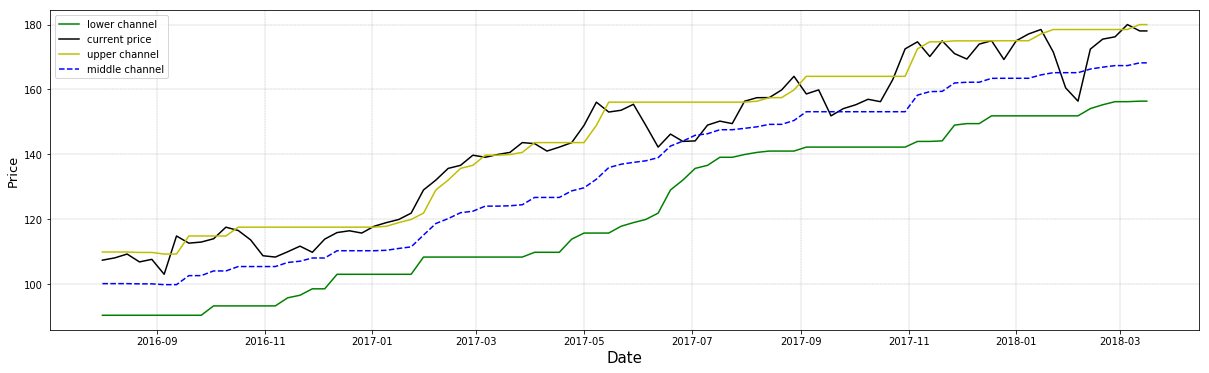

In [18]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(70, 20))
ax = fig.add_subplot(333)
ax.plot(channel_data['Date'], channel_data['Lower'], 'g', label="lower channel")
ax.plot(channel_data['Date'], channel_data['Current'], 'black', label="current price")
ax.plot(channel_data['Date'], channel_data['Upper'], 'y', label="upper channel")
ax.plot(channel_data['Date'], channel_data['Middle'], 'b--', label="middle channel")
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Price', fontsize=13)
ax.legend(loc='upper left')
ax.grid(color='gray', linestyle='--', linewidth=0.3)

In [19]:
#version 1
cash = 10000
step_amount = 1000
volume = 0
current_price = channel_data.Current[0]

#buy $10000 stock at the begining
volume += int(10000 / current_price)
cash = 10000 - volume * current_price

for a in range(0,len(upper)):
    current_price = channel_data.Current[a]
    if current_price > channel_data.Upper[a]:
        #buy stocks use $1000, the step amount
        num_to_sell = int(step_amount / current_price)
        if(volume < num_to_sell):
            volume = 0
            cash += volume * current_price
        else:
            volume = volume - num_to_sell
            cash += num_to_sell * current_price
    # if the price lower than the lower channel, I need to sell stock
    elif current_price < channel_data.Lower[a]:
        volume = volume + int(step_amount/current_price)
        
# The final amount of money I can get is to sell all my stock at the last day + my cash remained
balance = volume * channel_data.Current[len(channel_data.Current)-1] + cash
print balance

11389.409739


In [20]:
#version 2
cash = 10000
step_amount = 1000
volume = 0
current_price = channel_data.Current[0]

#buy $10000 stock at the begining
volume += int(10000 / current_price)

for a in range(0,len(upper)):
    current_price = channel_data.Current[a]
    if current_price > channel_data.Upper[a]:
        #buy stocks use $1000, the step amount
        volume = volume + int(step_amount/current_price)
    # if the price lower than the lower channel, I need to sell stock
    elif current_price < channel_data.Lower[a]:
        # sell stock that worth <= $1000
        num_to_sell = int(step_amount / current_price)
        #if the volume of stock less than $1000, I will sell them all; or delete the 
        #amount of num_to_sell from my volume
        if(volume < num_to_sell):
            volume = 0
        else:
            volume = volume - num_to_sell

# The final amount of money I can get is to sell all my stock at the last day + my cash remained
balance = volume * channel_data.Current[len(channel_data.Current)-1]
print balance

48599.461092
